In [1]:
%load_ext autoreload

# --------------- #
# region: Imports #
import os
import sys
module_path = os.path.abspath('../../..')
if module_path not in sys.path:
    sys.path.insert(0, module_path)
# endregion       #
# --------------- #

In [2]:
%autoreload 2
from examples.ft.env import FoodTrucks
from examples.ft.config import load_config
from examples.ft.utils import visual_field, add_models
from examples.ft.models.humanplayer import ModelHumanPlayer
from matplotlib import pyplot as plt
import argparse

parser = argparse.ArgumentParser()
parser.add_argument("--config", help="path to config file")
args = parser.parse_args(['--config', '../config.yaml'])
cfg = load_config(
    args
)


env = FoodTrucks(
    cfg
)

In [3]:
img = visual_field(
    env.world,
    return_rgb = True
)

models = [
    ModelHumanPlayer(
        action_space = [0, 1, 2, 3],
        memory_size = 3
    )
]
agents = env.get_entities('Agent')
add_models(agents, models)
env.reset()
for agent in agents:
    agent.reset()

turn = 0

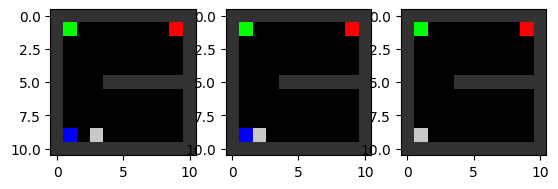

ValueError: invalid literal for int() with base 10: ''

In [4]:
for agent in agents:

    while turn < 20:
        done = 0
        turn += 1
        state, action, reward, next_state = agent.transition(env)
        agent.episode_memory.append((
            0,
            (state, action, reward, next_state, done)
        ))
    